In [24]:
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
import os
import time

In [8]:
img = rio.open('data.tif')
masks = rio.open('label.tif')
img_data = img.read()
masks_data = masks.read()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


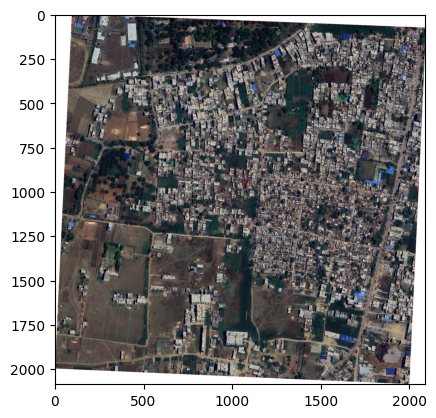

In [9]:
plt.imshow(img_data.transpose((1,2,0)))

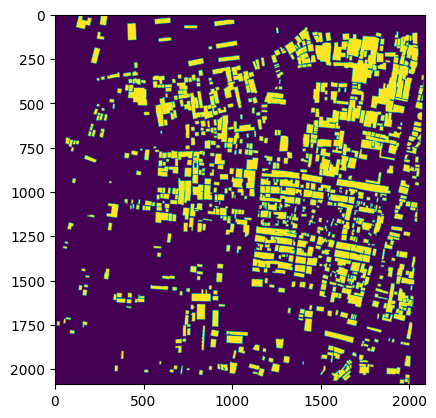

In [12]:
plt.imshow(masks_data.transpose((1,2,0)))

In [13]:
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

In [16]:
image = 'subimage.tif'

In [14]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=None,
)

In [26]:
st = time.time()
sam.generate(image, output="subimage_mask.tif", foreground=True, unique=True)
ed = time.time()
print(ed-st)

77.02611589431763


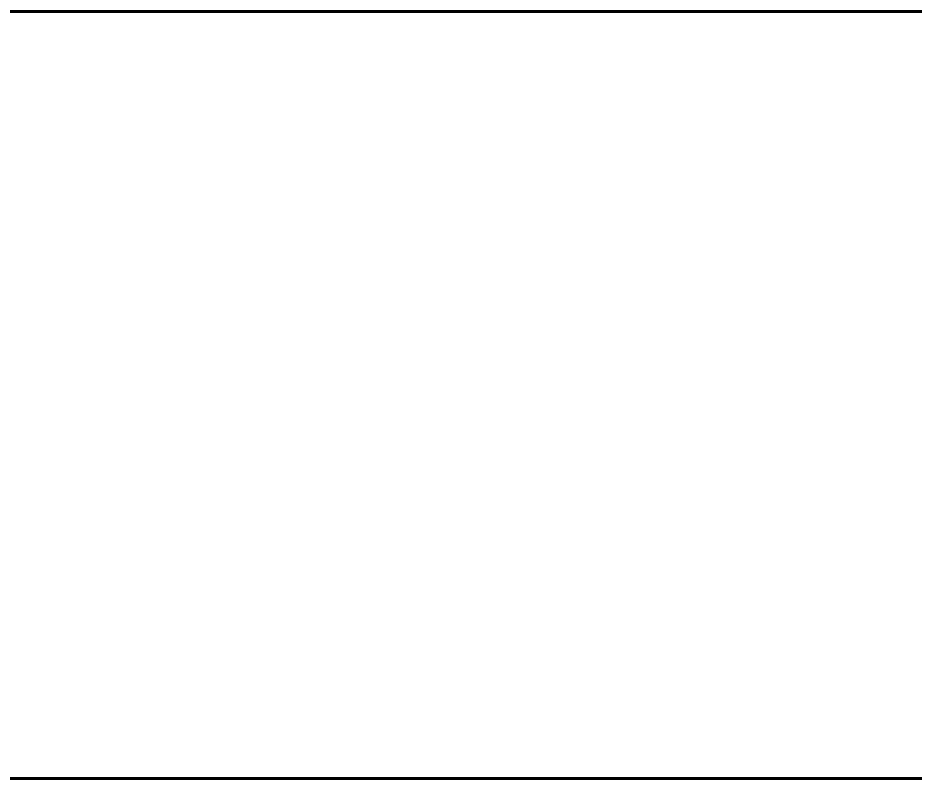

In [27]:
sam.show_masks(cmap="binary_r")

In [28]:
sam.tiff_to_vector("subimage_mask.tif","results/subimage_masks.shp")

# Hyperparameter tuinning

In [30]:
sam_kwargs = {
    "points_per_side": 32,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 100,
}

In [31]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=sam_kwargs,
)

In [32]:
st = time.time()
sam.generate(image, output="subimage_mask.tif", foreground=True, unique=True)
ed = time.time()
print(ed-st)

200.51043701171875


In [33]:
sam.tiff_to_vector("subimage_mask.tif","results/subimage_masks.shp")